In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import random
%matplotlib inline


def small_f(S_a, I_x):
    #return the sim of the image in S_a with highest sim with I_x 
    max_sim = 0
    max_sim_idx = 0
    for I_sa in S_a:
        sim = cos_sim(I_sa, I_x)
        if sim > max_sim:
            max_sim = sim
    
    return max_sim
    

def big_f(S_a, S_u):
    #Sum small_f for all images in S_u f_small(S_a, I_from_S_u)
    current_sum = 0
    for I_su in S_u:
        current_sum += small_f(S_a, I_su)
    
    return current_sum


def cos_sim(I_i, I_j):
    return np.dot(I_i, I_j.T) / I_i.shape[0] ** 2


def max_rep(S_u, S_c, Sc_idx):
    S_a_idx = []
    S_a = []
    
    while len(S_a) < small_k:
        current_best = 0
        current_best_idx = None
        for i, img_and_idx in enumerate(zip(S_c, Sc_idx)):
            S_a.append(img_and_idx[0])
            tmp_score = big_f(S_a, S_u)
            if tmp_score > current_best:
                current_best = tmp_score
                current_best_idx = i

            S_a.pop()
            
        S_a.append(S_c[current_best_idx])
        S_a_idx.append(Sc_idx[current_best_idx])
        S_c.pop(current_best_idx)
        Sc_idx.pop(current_best_idx)
        
    return S_a_idx



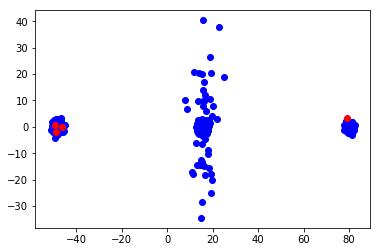

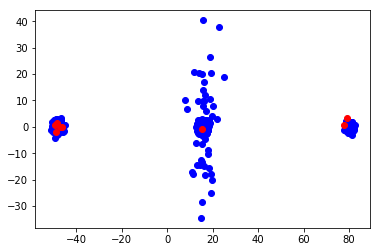

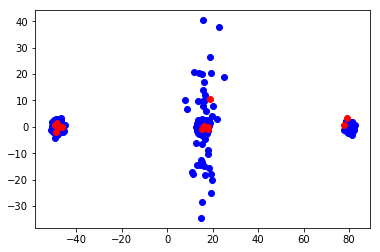

In [42]:
num_images = 10

images_cluster1 = np.random.normal(loc=2.0, scale=1.0, size=(400, 1024))
images_cluster2 = np.random.normal(loc=4.0, scale=1.0, size=(400, 1024))
images_cluster3 = np.random.normal(loc=6.0, scale=1.0, size=(150, 1024))
images_outliers = np.random.normal(loc=4.0, scale=3.0, size=(50, 1024))

images = np.concatenate((images_cluster1, images_cluster2, images_cluster3, images_outliers), axis=0)


#img_cluster1 = np.random.norma(loc=)
pca = PCA(n_components=2)

pca_img = pca.fit_transform(images)

big_k = 8
small_k = 4
num_iterations = 3
S_u = list(images)
S_u_idx = range(len(S_u))
S_a = [] #These are actual annotated

for i in range(num_iterations):
    
    random_Sc_idx = random.sample(range(len(S_u_idx)), big_k)
    S_c = list(images[random_Sc_idx,:])
    
    S_a_indices = max_rep(S_u, S_c, random_Sc_idx)
    S_a.extend(S_a_indices)

    S_u_idx = [x for x in range(len(S_u)) if x not in S_a]
    plt.figure(i)
    plt.scatter(pca_img[S_u_idx, 0], pca_img[S_u_idx, 1], c='b')
    plt.scatter(pca_img[S_a, 0], pca_img[S_a, 1], c='r')
    